# Part 1) Load the data and make a datetime index.

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# URL CSV
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')
df.info()
df.head(2)

## Convert the date column to datetime dtype.



In [ ]:
# convert dtype to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

df.info()
df.head(2)

In [ ]:
## Creating/testing our time format
import datetime as dt
today_datetime = dt.datetime.today()

fmt = "%Y/%m/%d"
today_datetime.strftime(fmt)

## Set the date column as the index.


In [ ]:
df = df.set_index('date')
df.head()

## Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth


In [ ]:
# filter years 2000+ and keep requested columns
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 
                      'snow_depth']]

df.head()

## Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
# imputation for prec, using the day after to fill 
df['precipitation'] = df['precipitation'].fillna(method='bfill')

In [ ]:
# imputation for snow depth, using 0 as most entries are 0.
df['snow_depth'] = df['snow_depth'].fillna(0)

In [ ]:
# imputation for mean temp, using two values before and after
df['mean_temp'] = df['mean_temp'].interpolate()

In [ ]:
# imputation for min temp, using two values before and after
df['min_temp'] = df['min_temp'].interpolate()

In [ ]:
# imputation for max temp, using two values before and after
df['max_temp'] = df['max_temp'].interpolate()

In [ ]:
# confirm imputations
df.isna().sum()

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

-For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.

**Note: you may want to make a temporary DataFrame that you will use to answer this question only.**

## Q1: What month had the most precipitation between 2000 through 2010?



In [29]:
# dataframe with years and column
prec_df = df.loc['2000':'2010', ['precipitation']]
prec_df.head(2)

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2


### Resample the data as Monthly frequency.

In [30]:
# Coverting data from daily to monthly 
prec_ms = prec_df.asfreq("MS")
prec_ms.name = "asfreq"
prec_ms.head()


,precipitation
date,
2000-01-01,0.0
2000-02-01,9.8
2000-03-01,0.2
2000-04-01,0.6
2000-05-01,0.0


In [31]:
# Resample the data as Monthly frequency. sum, of each month
mon_prec_res = prec_df.resample("MS").sum()
mon_prec_res.name = 'Resampled'
mon_prec_res.head()


,precipitation
date,
2000-01-01,14.7
2000-02-01,67.4
2000-03-01,14.2
2000-04-01,90.8
2000-05-01,87.4


### Find the date and corresponding value for the max precipitation

In [32]:
# Find the date max precipitation
max_date = prec_df['precipitation'].idxmax()
max_date

Timestamp('2000-10-29 00:00:00')

In [33]:
# Find the value for the max precipitation
precipitation = prec_df['precipitation'].loc[max_date]
precipitation

36.6

In [34]:
# Statement for the max precipitation.

print(f"The date with the most precipitation was {max_date.strftime('%m/%d/%Y')}, which was a {precipitation} inches.")

The date with the most precipitation was 10/29/2000, which was a 36.6 inches.


**Visualization Issue Workaround**

- NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:

- To get around this issue, first, create your fig and ax using plt.subplots()
    - Now you may use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

In [ ]:
#fig, ax = plt.subplots(figsize=(12,3))
#df.plot(ax=ax)


## Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks.

# QUESTION: how t=do i get the value on the line or in the legend

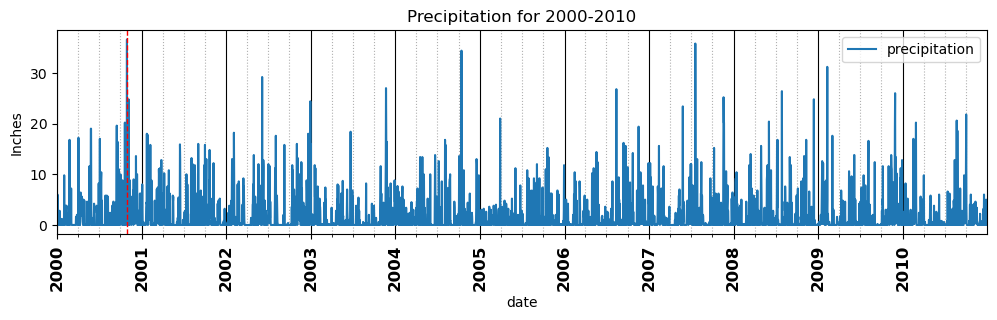

In [51]:
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
prec_df.plot(ax=ax,title='Precipitation for 2000-2010');
# y label
plt.ylabel('Inches')
# line for date of max precipitation
ax.axvline("10/29/2000",color='red',lw=1, ls='--')

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )

##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)

##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')



In [36]:
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")

loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

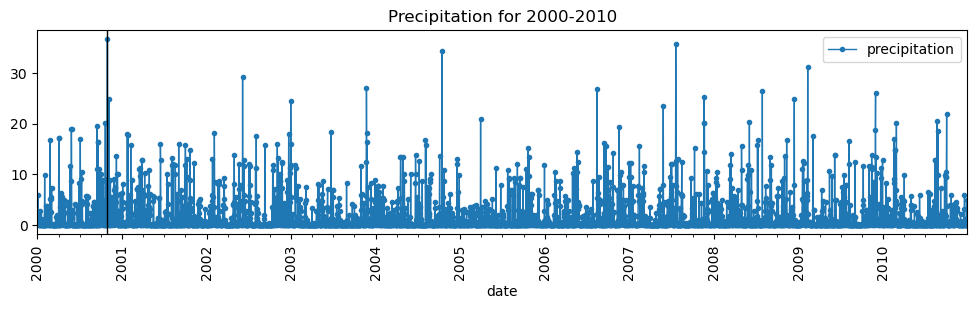

In [41]:
#Create a wide figure (e.g. figsize=(12,3))
fig, ax = plt.subplots(figsize=(12,3))
#With the title "Precipitation for 2000-2010"
prec_df.plot(ax=ax,title='Precipitation for 2000-2010',marker='.',lw=1)
#With a ylabel of "Inches"

##Customize the major xaxis ticks to:
#Have major xaxis ticks every 1 year.
ax.xaxis.set_major_locator(loc_year)
#Use 4-digit years for the labels
ax.xaxis.set_major_formatter(fmt_year)

#Rotate the major ticks' labels 90 degrees.
fig.autofmt_xdate(rotation=90,ha='center')

##Customize the minor xaxis ticks to:
#Have minor xaxis ticks every 3 months
ax.xaxis.set_minor_locator(loc_3months)

#Do not label the minor ticks.

# Add a vertical line at this date with a label that says the date 
    #(using date format: "April 2000") and the max precipitation value.
ax.axvline("10/29/2000",color='k',lw=1, ls='-')

- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

## Q2: Which year between 2000-2020 had the coolest average temperature?


In [24]:
# dataframe with years and column
temp_df = df.loc['2000':'2020', ['mean_temp']]
temp_df.head(2)

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9


## Resample the data as Yearly frequency.

In [25]:
# Resample the data as Yearly frequency, for average
ts_Y_res = temp_df.resample("AS").mean()
ts_Y_res.name = 'Resampled'
ts_Y_res.head()


,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683


## Determine the date and value for the lowest mean temp.

In [26]:
# Find the date min mean temp
min_date = temp_df['mean_temp'].idxmin()
min_date

Timestamp('2010-12-20 00:00:00')

In [27]:
# Find the value for the min mean temp
low_temp = temp_df['mean_temp'].loc[min_date]
low_temp

-4.1

In [28]:
# Statement for the min mean temp.

print(f"The date with the lowest average temp was {min_date.strftime('%m/%d/%Y')}, where it was {low_temp}.")

The date with the lowest average temp was 12/20/2010, where it was -4.1.


## Q2 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Average Temperature"
        - With a ylabel of "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks.

In [ ]:
#Create a wide figure (e.g. figsize=(12,3))
fig, ax = plt.subplots(figsize=(12,3))
#With the title "Precipitation for 2000-2010"
prec_df.plot(ax=ax,title='Precipitation for 2000-2010',marker='.',lw=1)
#With a ylabel of "Inches"

##Customize the major xaxis ticks to:
#Have major xaxis ticks every 1 year.
ax.xaxis.set_major_locator(loc_year)
#Use 4-digit years for the labels
ax.xaxis.set_major_formatter(fmt_year)

#Rotate the major ticks' labels 90 degrees.
fig.autofmt_xdate(rotation=90,ha='center')

##Customize the minor xaxis ticks to:
#Have minor xaxis ticks every 3 months
ax.xaxis.set_minor_locator(loc_3months)

#Do not label the minor ticks.

# Add a vertical line at this date with a label that says the date 
    #(using date format: "April 2000") and the max precipitation value.
ax.axvline("10/29/2000",color='k',lw=1, ls='-')

- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!

- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value